**SERGIO RODRIGUEZ BAUTISTA - SANDY ATENCIO HERNANDEZ**

**1. Describa el dataset.**

In [28]:
#SE IMPORTAN LIBRERIAS
import sklearn.linear_model as lm;
import sklearn.model_selection as ms;
import matplotlib.pyplot as plt;
import pandas as pd;
from   statistics import mode, StatisticsError;
import numpy as np;
import seaborn as sns;
#SE CONFIGURA EL TAMAÑO DEL GRAFICO DE CORRELACIÓN
sns.set(rc={'figure.figsize':(14,12)})

In [4]:
#SE CARGA EL DATASET SERVO
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/servo/servo.data', delimiter=',', decimal='.', header=None, names=['motor','screw','pgain','vgain','class'] );
datos = pd.DataFrame(data);
#DESCRIPCIÓN DEL DATASET 
print('Descripción del dataset: \n\n', datos.describe(include='all'), '\n');

Descripción del dataset: 

        motor screw       pgain       vgain       class
count    167   167  167.000000  167.000000  167.000000
unique     5     5         NaN         NaN         NaN
top        C     A         NaN         NaN         NaN
freq      40    42         NaN         NaN         NaN
mean     NaN   NaN    4.155689    2.538922    1.389708
std      NaN   NaN    1.017770    1.369850    1.559635
min      NaN   NaN    3.000000    1.000000    0.131250
25%      NaN   NaN    3.000000    1.000000    0.503126
50%      NaN   NaN    4.000000    2.000000    0.731254
75%      NaN   NaN    5.000000    4.000000    1.259369
max      NaN   NaN    6.000000    5.000000    7.100108 



**CREADOR**:
Karl Ulrich

**INFO**:

La información es de una simulación de un sistema servo que incluye un servoamplificador, un motor, un tornillo / tuerca de avance y un carro deslizante de algún tipo. Puede haber estado en uno de los ejes de traslación de un robot en el noveno piso del laboratorio de IA. En cualquier caso, el valor de salida es casi seguramente un tiempo de subida, o el tiempo requerido para que el sistema responda a un cambio de paso en un punto de ajuste de posición.

**ATRIBUTOS**:

1. motor: A, B, C, D, E 
2. tornillo: A, B, C, D, E 
3. pgain(GananciaP): 3,4,5,6 
4. vgain(GananciaV): 1,2,3,4,5 
5. clase: 0.13 a 7.10

**2. Calcule, para las variables numéricas, las medidas de tendencia central (media, moda, mediana) y la desviación estándar.**

In [11]:
print("\nGANANCIA P \n");
print("Media: "   + str( datos["pgain"].mean()   ) );
try:
    print('Moda: ', mode(datos["pgain"]));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada en los datos');
print("Mediana: " + str( datos["pgain"].median() ) );
print("Desviación estándar: " + str( datos["pgain"].std() ) );

print("\nGANANCIA V \n");
print("Media: "   + str( datos["vgain"].mean()   ) );
try:
    print('Moda: ', mode(datos["vgain"]));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada en los datos');
print("Mediana: " + str( datos["vgain"].median() ) );
print("Desviación estándar: " + str( datos["vgain"].std() ) );

print("\nCLASE \n");
print("Media: "   + str( datos["class"].mean()  ) );
try:
    print('Moda: ', mode(datos["class"]));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada en los datos');
print("Mediana: " + str( datos["class"].median() ) );
print("Desviación estándar: " + str( datos["class"].std() ) );


GANANCIA P 

Media: 4.155688622754491
Moda:  4
Mediana: 4.0
Desviación estándar: 1.0177701110003585

GANANCIA V 

Media: 2.538922155688623
Moda:  2
Mediana: 2.0
Desviación estándar: 1.3698496223599352

CLASE 

Media: 1.3897083879041905
Moda:  0.5062525
Mediana: 0.7312541
Desviación estándar: 1.5596351689556234


**3. Identifique variables correlacionadas gracias a un diagrama de dispersión.**

VARIABLES CORRELACIONADAS:

          pgain     vgain     class
pgain  1.000000  0.812268 -0.598129
vgain  0.812268  1.000000 -0.364383
class -0.598129 -0.364383  1.000000 


DIAGRAMA DE DISPERSIÓN:



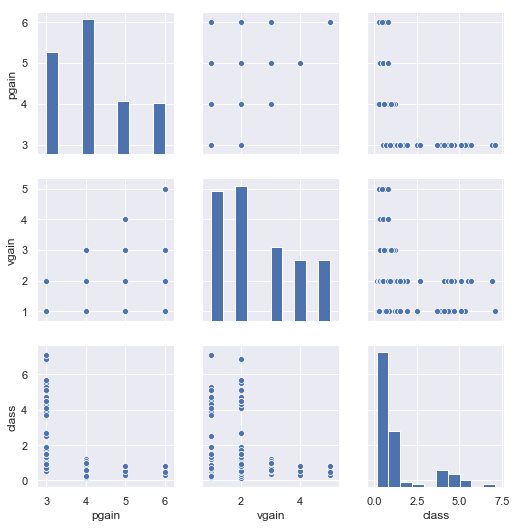

In [35]:
print('VARIABLES CORRELACIONADAS:\n');
print( datos.corr(), "\n\n");

#OTRA FORMA DE MOSTRAR LA CORRELACION DE LAS VARIABLES
#sns.heatmap(datos.corr(), square=True, annot=True);

#VARIABLES CORRELACIONADAS MEDIANTE DIAGRAMA DE DISPERSION
#sns.pairplot( datos, kind="reg");
print('DIAGRAMA DE DISPERSIÓN:\n');
sns.pairplot( datos);

#DATOS DE GANANCIA P Y V
X = datos.iloc[:,2:4];
#DATOS OBJETIVO
Y = datos.iloc[:,4]

**4. Entrene un modelo de Regresión lineal variando la proporción existente entre los datos de entrenamiento y los datos de prueba.**

In [14]:
#SE ENTRENA EL PRIMER MODELO  CON UN 10%  DE VERIFICACIÓN
X_train1, X_test1, Y_train1, Y_test1 = ms.train_test_split(X, Y, test_size = 0.1);
#SE OPTIMIZAN LOS COEFICIENTES DE DETERMINACIÓN
lr1 = lm.LinearRegression(normalize=True);
#SE ENTRENA EL MODELO
lr1.fit(X_train1, Y_train1);
#LA X QUE INGRESA DEBE SER LA MISMA DESPUES DEL AJUSTE, PARA EL CALCULO DE LA INTERCEPCION SE CENTRAN LOS DATOS, 
#SE ESTABLECE EL NUMERO DE PROCESOS DEL NUCLEOS y SE VUELVE A OPTIMIZAR EL COEFICIENTE DE DETERMINACIÓN
lm.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True);

In [15]:
#SE ENTRENA EL SEGUNDO MODELO  CON UN 20%  DE VERIFICACIÓN
X_train2, X_test2, Y_train2, Y_test2 = ms.train_test_split(X, Y, test_size = 0.2);
#SE OPTIMIZAN LOS COEFICIENTES DE DETERMINACIÓN
lr2 = lm.LinearRegression(normalize=True);
#SE ENTRENA EL MODELO
lr2.fit(X_train2, Y_train2);
#LA X QUE INGRESA DEBE SER LA MISMA DESPUES DEL AJUSTE, PARA EL CALCULO DE LA INTERCEPCION SE CENTRAN LOS DATOS, 
#SE ESTABLECE EL NUMERO DE PROCESOS DEL NUCLEOS y SE VUELVE A OPTIMIZAR EL COEFICIENTE DE DETERMINACIÓN
lm.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True);

In [16]:
#SE ENTRENA EL TERCER MODELO  CON UN 30%  DE VERIFICACIÓN
X_train3, X_test3, Y_train3, Y_test3 = ms.train_test_split(X, Y, test_size = 0.3);
#SE OPTIMIZAN LOS COEFICIENTES DE DETERMINACIÓN
lr3 = lm.LinearRegression(normalize=True);
#SE ENTRENA EL MODELO
lr3.fit(X_train3, Y_train3);
#LA X QUE INGRESA DEBE SER LA MISMA DESPUES DEL AJUSTE, PARA EL CALCULO DE LA INTERCEPCION SE CENTRAN LOS DATOS, 
#SE ESTABLECE EL NUMERO DE PROCESOS DEL NUCLEOS y SE VUELVE A OPTIMIZAR EL COEFICIENTE DE DETERMINACIÓN
lm.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True);


**5. Evalúe la efectividad de cada uno de los modelos.**

In [46]:
#SE HACE VALIDACIÓN DE LA PREDICCION
y_pred = lr1.predict(X_test1);
comp1 = pd.DataFrame({'Y-OBJETIVO': Y_test1, 'Y-PRONOSTICADA': y_pred });

y_pred2 = lr2.predict(X_test2);
comp2 = pd.DataFrame({'Y-OBJETIVO': Y_test2, 'Y-PRONOSTICADA': y_pred2 });

y_pred3 = lr3.predict(X_test3);
comp3 = pd.DataFrame({'Y-OBJETIVO': Y_test3, 'Y-PRONOSTICADA': y_pred3 });


efectividadModelo1 = lr1.score(X_test1, Y_test1);
efectividadModelo2 = lr2.score(X_test2, Y_test2);
efectividadModelo3 = lr3.score(X_test3, Y_test3);

print("\nEfectividad del modelo con un 10% de datos de prueba: " + str( efectividadModelo1 ) );
print("Efectividad del modelo con un 20% de datos de prueba: " + str( efectividadModelo2 ) );
print("Efectividad del modelo con un 30% de datos de prueba: " + str( efectividadModelo3 ) );


Efectividad del modelo con un 10% de datos de prueba: 0.2387449813971262
Efectividad del modelo con un 20% de datos de prueba: 0.3278024506364783
Efectividad del modelo con un 30% de datos de prueba: 0.29461420263146076


**6. Construya una gráfica que relaciona la cantidad de datos usados para el entrenamiento con la efectividad obtenida para el modelo y describa sus hallazgos.**

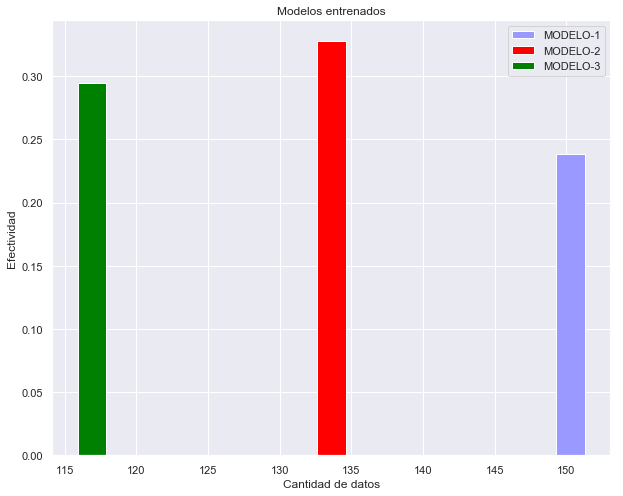

In [47]:
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL PRIMER MODELO
cantidadDatos1erModelo = len(X.index) - (len(X.index)*10)/100;
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL SEGUNDO MODELO
cantidadDatos2doModelo = len(X.index) - (len(X.index)*20)/100;
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL TERCER MODELO
cantidadDatos3erModelo = len(X.index) - (len(X.index)*30)/100;

# configurando el tamaño de la figura
plt.figure( figsize=(10, 8) );

plt.bar(cantidadDatos1erModelo, efectividadModelo1, facecolor='#9999ff', edgecolor='white',width=2, label='MODELO-1' );
plt.bar(cantidadDatos2doModelo, efectividadModelo2, facecolor='red', edgecolor='white',width=2, label='MODELO-2');
plt.bar(cantidadDatos3erModelo, efectividadModelo3, facecolor='green', edgecolor='white',width=2, label='MODELO-3');

plt.title('Modelos entrenados');
plt.xlabel('Cantidad de datos');
plt.ylabel('Efectividad');
plt.legend(loc='best')
plt.show();

**Con la grafica de barras creada se puede observar la relacion entre la cantidad de datos usados por cada modelo de entrenamiento y su eficiencia. Por otra parte se puede ver que el modelo de regresion lineal no genera una efectividad muy alta, pero de igual forma se evidencia que el modelo mas efectivo fue el usado con un 20% de los datos usados en la verificación.**

**¡OJO SI SE VUELVE A EJECUTAR LA FUNCION " train_test_split() " EN CADA MODELO ES CLARO QUE LA EFECTIVIDAD DE CADA UNO VA CAMBIAR!**